# Exercise 1 

In this exercise, we will practice applying self-organizing maps to the `digits` dataset from `sklearn`.

### Exercise 1(a) (5 points)

First install the `MiniSom` library as follows:

```
pip install minisom
```

Then, load the below libraries and the `digits` dataset.

```
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

digits = load_digits()
X, y = digits['data'], digits['target']
```

In [1]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

digits = load_digits()
X, y = digits['data'], digits['target']

### Exercise 1(b) (2 points)

Transform each of the columns of `X` to 0-1 scale using `MinMaxScaler`.

In [2]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Exercise 1(c) (6 points)

Tranin the `MiniSom` over a 30x30 grid. Use `learning_rate=0.5`


In [4]:
# define the SOM
som = MiniSom(30, 30, 64, sigma=4, learning_rate=0.5, neighborhood_function='triangle')

# train the SOM
som.train(X, 5000, random_order=True)

### Exercise 1(d) (6 points)

Visualize the `MiniSom` results.

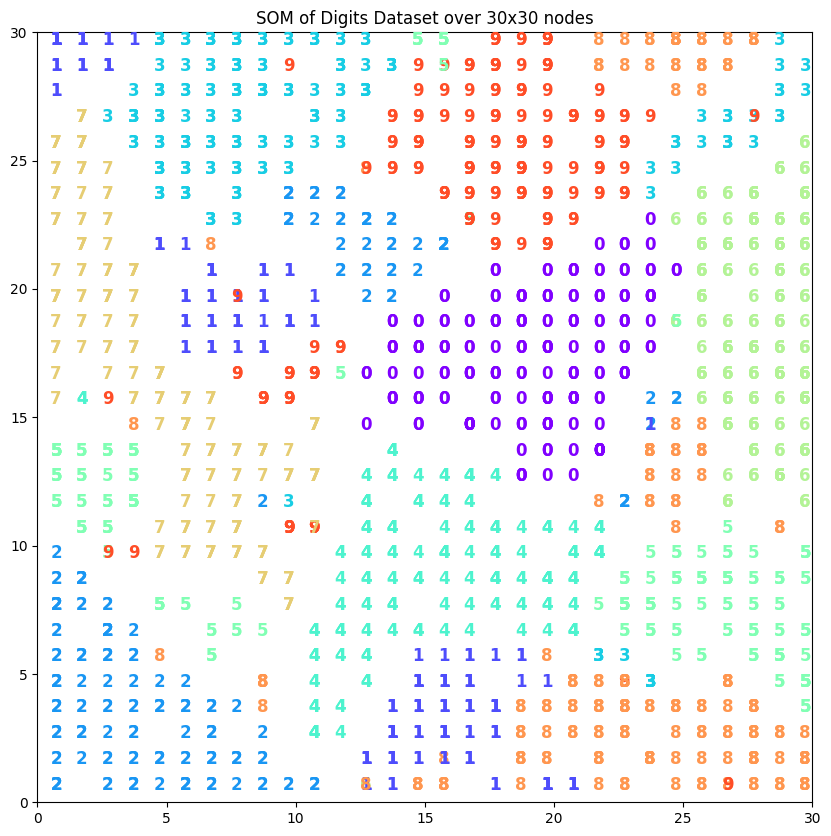

In [5]:
plt.figure(figsize=(10, 10))

wmap = {}
im = 0
for x, t in zip(X, y):
    w = som.winner(x)
    wmap[w] = im
    plt.text(w[0]+.5, w[1]+.5, str(t), color=plt.cm.rainbow(t/10), fontdict={'weight': 'bold', 'size': 12})
    im = im + 1
    
plt.axis([0, som.get_weights().shape[0], 0, som.get_weights().shape[1]])
plt.title('SOM of Digits Dataset over 30x30 nodes')
plt.show()

# Exercise 2 

In this exercise, we will practice applying Restricted Boltzmann machines to the `digits` dataset from `sklearn`.

### Exercise 2(a) (5 points)

Load the below libraries and the `digits` dataset.

```
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import BernoulliRBM

digits = load_digits()
data = digits.data
images = digits.images
labels = digits.target
```

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import BernoulliRBM

digits = load_digits()
data = digits.data
images = digits.images
labels = digits.target

### Exercise 2(b) (2 points)

Transform each of the columns of `data` to 0-1 scale using `MinMaxScaler`.

In [7]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

### Exercise 2(c) (5 points)

Train the `BernoulliRBM` model.

In [12]:
# define the RBM
rbm = BernoulliRBM(n_components=32, learning_rate=0.1, n_iter=50, random_state=0)

# train the RBM
rbm.fit(data)

BernoulliRBM(n_components=32, n_iter=50, random_state=0)

### Exercise 2(d) (5 points)

Transform, and then reconstruct the data

In [13]:
# transform the data
data_reduced = rbm.transform(data)

# transform the data back
data_reconstructed = np.dot(data_reduced, rbm.components_)

### Exercise 2(e) (6 points)

Visualize the original data and the reconstructed data using `BernoulliRBM`.

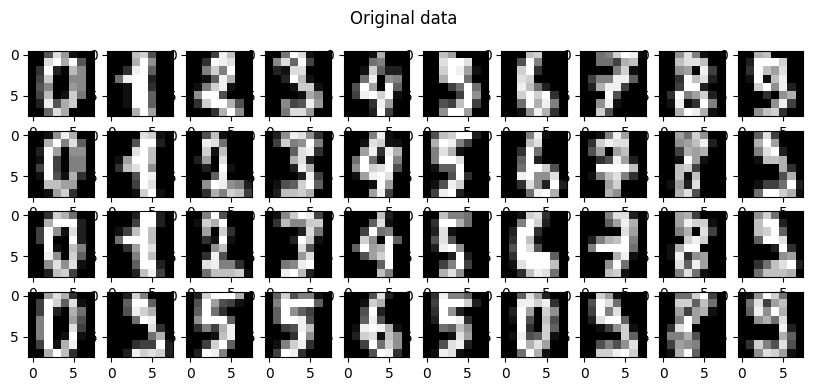

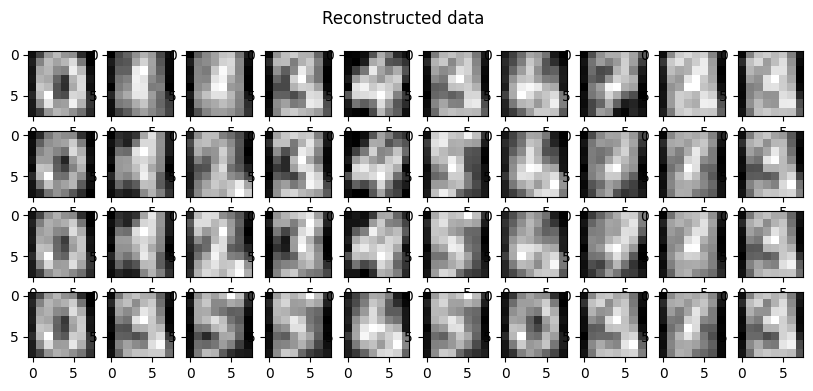

In [14]:
# plot the original data and the reduced data
def plot_digits(data, title):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4))
    for i,  ax in enumerate(axes.ravel()):
        ax.imshow(data[i].reshape(8, 8), cmap='gray')
    plt.suptitle(title)
    plt.show()
    
# plot the original data
plot_digits(images, 'Original data')

# plotting reconstructed data
plot_digits(data_reconstructed, 'Reconstructed data')